## 분석목적 설명
- 현재는 2021년, 000님은 가상의 홈쇼핑 기반 온라인 커머스 기업 ‘다잇다'의 데이터 분석가로 해당 서비스의 데이터 분석을 진행하려고 합니다.
- ‘다잇다'의 고객 구매 이력 데이터를 기반으로 고객의 추가 구매 유도를 하기 위한 방안을 수립하고자 합니다. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/raphaelseo/Documents/study/fastcampus/바이트디그리/마케팅/class02/data/online_commerce_data.csv')

In [4]:
df.shape

(147311, 14)

In [5]:
df.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount
0,2021059651101,68.0,9,202106072433746,2021/06/07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910
1,2018069800502,49.0,2,202105311957155,2021/05/31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000
2,2019073300103,35.0,1,202105138020462,2021/05/13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400
3,2020075283364,41.0,9,202106171444319,2021/06/17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080
4,2020104780765,46.0,1,202106024431989,2021/06/02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610


### 컬럼 타입 확인

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147311 entries, 0 to 147310
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_no      147311 non-null  int64  
 1   age              147273 non-null  float64
 2   gender           147311 non-null  int64  
 3   order_no         147311 non-null  int64  
 4   order_date       147311 non-null  object 
 5   channel          147311 non-null  object 
 6   item_category    147311 non-null  object 
 7   item_code        147311 non-null  int64  
 8   item_name        147311 non-null  object 
 9   price            147311 non-null  int64  
 10  qty              147311 non-null  int64  
 11  order_amount     147311 non-null  int64  
 12  discount_amount  147311 non-null  int64  
 13  paid_amount      147311 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 15.7+ MB


### 결측치 확인

In [7]:
for c in df.columns:
    t = df[c]
    if t.isnull().sum() != 0:
        print(c)

age


In [8]:
df[df['age'].isnull()].shape

(38, 14)

#### 결측치 처리 방법
- 나이 컬럼에서 약 38개의 결측치가 존재
- 보유한 데이터 147311 건중 38개의 경우 매우 적은 비율이라 생각되어 결측치 삭제 진행

In [9]:
df = df.dropna()

In [10]:
df.shape

(147273, 14)

### 데이터 설명
- customer_no : 고객번호 (고객 식별 값, 보통 고유함)
  - 고객번호의 앞 여섯 자리는 고객의 가입연월을 의미함 (eg. 2019073300103 고객의 가입연월은 2019-07)
- age : 고객 연령
- gender : 고객 성별 (1 : 남성, 2 : 여성, 9 : 성별 알 수 없음)
- order_no : 주문 번호
- order_date : 주문 일자
- channel : 주문 채널 (TV, Mobile)
- item_category : 아이템 카테고리
- item_code : 아이템 코드
- item_name : 아이템명
- price : 판매가
- qty : 주문 수량
- order_amount : 주문 금액
- discount_amount : 할인 금액
- paid_amount : 고객 결제 금액

In [11]:
# 시간데이터 변환   
df['order_date'] = pd.to_datetime(df['order_date'])

## 고객과 서비스의 특징 분석

### 성별 및 연령분포

In [12]:
from matplotlib import rc
rc('font', family='AppleGothic')

In [13]:
age_labels = ['20 or under', '21-25', '26-30', '31-35', '36-40', 'over 40']

In [14]:
bins = [0, 20, 25, 30, 35, 40, float('inf')]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=age_labels, right=False)

In [15]:
df.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,age_group
0,2021059651101,68.0,9,202106072433746,2021-06-07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910,over 40
1,2018069800502,49.0,2,202105311957155,2021-05-31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000,over 40
2,2019073300103,35.0,1,202105138020462,2021-05-13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,36-40
3,2020075283364,41.0,9,202106171444319,2021-06-17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080,over 40
4,2020104780765,46.0,1,202106024431989,2021-06-02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610,over 40


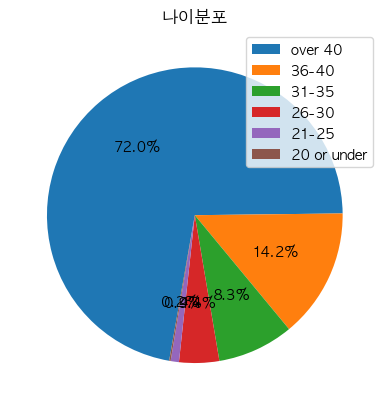

In [16]:
value_counts = df['age_group'].value_counts(normalize=True)
ratio = value_counts.values
labels = value_counts.index
plt.pie(ratio, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('나이분포')
plt.legend(labels, loc='upper right')
plt.show()

#### 피드백
- 나이가 하나로 치중되어있음
- 히스토그램을 활용하여 나이의 분포를 확인한 후 그룹화를 진행하는 것이 좋음

In [17]:
print(value_counts)

age_group
over 40        0.720329
36-40          0.141900
31-35          0.083369
26-30          0.043762
21-25          0.009010
20 or under    0.001630
Name: proportion, dtype: float64


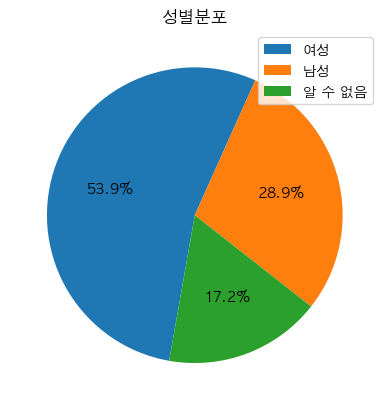

In [19]:
value_counts = df['gender'].value_counts(normalize=True)
n_labels = value_counts.index
ratio = value_counts.values
label_dic = {1:'남성', 2:'여성', 9:'알 수 없음'}
labels = [label_dic[i] for i in n_labels]
plt.pie(ratio, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('성별분포')
plt.legend(labels, loc='upper right')
plt.show()

#### 성별과 연령 분포 시각화 결과
- 대부분의 고객은 여성이며 41세 이상의 고객이 가장 많았습니다.
- 20세 이하의 경우 전채 고객의 약 0.16% 정도를 차지하며 가장 적은 고객수를 갖고있습니다.

### 고객 타입별 평균 구매회수와 총 구매금액 비교

In [21]:
df.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,age_group
0,2021059651101,68.0,9,202106072433746,2021-06-07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910,over 40
1,2018069800502,49.0,2,202105311957155,2021-05-31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000,over 40
2,2019073300103,35.0,1,202105138020462,2021-05-13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,36-40
3,2020075283364,41.0,9,202106171444319,2021-06-17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080,over 40
4,2020104780765,46.0,1,202106024431989,2021-06-02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610,over 40


In [22]:
df.groupby('gender')['order_no'].count().reset_index().sort_values('order_no', axis=0, ascending=False)

,gender,order_no
1,2,79432
0,1,42527
2,9,25314


In [23]:
df.groupby('gender')['paid_amount'].mean().reset_index().sort_values('paid_amount', axis=0, ascending=False)

,gender,paid_amount
2,9,147712.242633
0,1,139484.860206
1,2,83656.895458


In [24]:
df.groupby('gender')['order_amount'].mean().reset_index().sort_values('order_amount', axis=0, ascending=False)

,gender,order_amount
2,9,161082.427510
0,1,157084.950032
1,2,91924.308213


In [25]:
df.groupby('gender')['discount_amount'].mean().reset_index().sort_values('discount_amount', axis=0, ascending=False)

,gender,discount_amount
0,1,17600.089825
2,9,13370.184878
1,2,8267.412756


#### 고객의 성별별 구매 금액 비교
- 저희 홈쇼핑의 고객의 대부분이 여성이기 때문에 절대적인 주문건수는 여성이 가장 많았습니다.
- 하지만 평균 구매 금액을 비교해본 결과는 결제 금액과 구매 금액 모두 성별 알 수 없음, 남성, 여성의 순으로 높게 나타났습니다.
- 할인 금액의 경우에는 남성, 알 수 없음, 여성의 순으로 높게 나타났습니다.

In [26]:
df.groupby('age_group')['order_no'].count().reset_index().sort_values('order_no', axis=0, ascending=False)

,age_group,order_no
5,over 40,106085
4,36-40,20898
3,31-35,12278
2,26-30,6445
1,21-25,1327
0,20 or under,240


In [27]:
df.groupby('age_group')['paid_amount'].mean().reset_index().sort_values('paid_amount', axis=0, ascending=False)

,age_group,paid_amount
2,26-30,201397.321955
1,21-25,196295.267521
0,20 or under,170769.666667
4,36-40,140507.054264
3,31-35,108854.763805
5,over 40,98447.333648


In [28]:
df.groupby('age_group')['order_amount'].mean().reset_index().sort_values('order_amount', axis=0, ascending=False)

,age_group,order_amount
2,26-30,225157.373157
1,21-25,223416.578749
0,20 or under,198232.458333
4,36-40,157788.071586
3,31-35,123546.329207
5,over 40,107933.997078


In [29]:
df.groupby('age_group')['discount_amount'].mean().reset_index().sort_values('discount_amount', axis=0, ascending=False)

,age_group,discount_amount
0,20 or under,27462.791667
1,21-25,27121.311228
2,26-30,23760.051202
4,36-40,17281.017322
3,31-35,14691.565402
5,over 40,9486.663430


#### 고객의 나이대별 구매 금액 비교
- 성별비교와 마찬가지로 고객의 많은 비중을 차지하고 있는 41세 이상의 고객의 주문 횟수가 많았습니다.
- 하지만 평균적인 구매 금액과 결제 금액의 경우에는 26세에서 30세 그룹이 가장 많은 평균 금액을 보여주었습니다.
- 할인 금액의 경우에는 나이가 어릴수록 더 높은 경향성을 보여주었습니다.

### 고객의 타입별 선호 카테고리

In [30]:
m_cate = df[df['gender']==1]['item_category'].value_counts().reset_index()
f_cate = df[df['gender']==2]['item_category'].value_counts().reset_index()
u_cate = df[df['gender']==9]['item_category'].value_counts().reset_index()

In [31]:
cate = df['item_category'].value_counts()

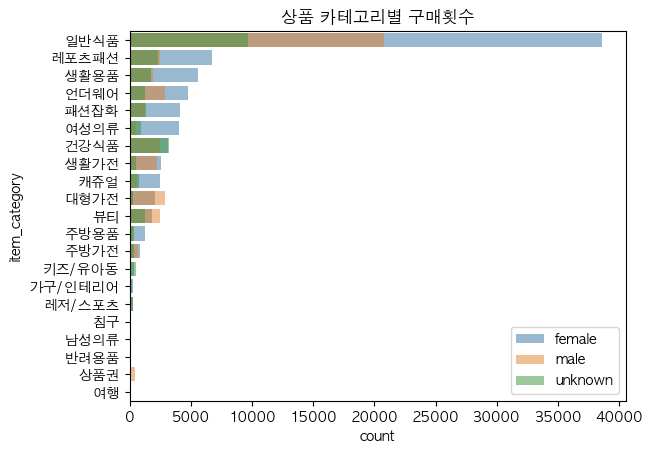

In [32]:
sns.barplot(data=f_cate, x='count', y='item_category', label='female', alpha=0.5)
sns.barplot(data=m_cate, x='count', y='item_category', label='male', alpha=0.5)
sns.barplot(data=u_cate, x='count', y='item_category', label='unknown', alpha=0.5)
plt.legend(loc='lower right')
plt.title('상품 카테고리별 구매횟수')
plt.show()

In [33]:
m_cate = df[df['gender']==1]['item_category'].value_counts(normalize=True)
f_cate = df[df['gender']==2]['item_category'].value_counts(normalize=True)
u_cate = df[df['gender']==9]['item_category'].value_counts(normalize=True)

In [34]:
print(m_cate)

item_category
일반식품       0.488090
대형가전       0.067886
언더웨어       0.067839
건강식품       0.059092
레포츠패션      0.058175
뷰티         0.057587
생활가전       0.051991
생활용품       0.044395
패션잡화       0.030498
주방가전       0.016648
캐쥬얼        0.013968
여성의류       0.011992
상품권        0.010276
주방용품       0.007195
레저/스포츠     0.005361
키즈/유아동     0.003316
가구/인테리어    0.002775
남성의류       0.001670
침구         0.000988
반려용품       0.000259
Name: proportion, dtype: float64


In [35]:
print(f_cate)

item_category
일반식품       0.485661
레포츠패션      0.084840
생활용품       0.070891
언더웨어       0.060404
패션잡화       0.052045
여성의류       0.050924
건강식품       0.039480
생활가전       0.031914
캐쥬얼        0.031423
대형가전       0.026224
뷰티         0.023580
주방용품       0.015900
주방가전       0.011129
키즈/유아동     0.004897
가구/인테리어    0.003563
레저/스포츠     0.003349
침구         0.001964
남성의류       0.000881
반려용품       0.000667
상품권        0.000239
여행         0.000025
Name: proportion, dtype: float64


In [36]:
print(u_cate)

item_category
일반식품       0.381093
건강식품       0.127913
레포츠패션      0.091214
생활용품       0.069803
패션잡화       0.053291
언더웨어       0.049696
뷰티         0.048550
여성의류       0.036818
캐쥬얼        0.031208
키즈/유아동     0.021885
생활가전       0.021056
주방용품       0.015486
주방가전       0.013155
대형가전       0.012483
레저/스포츠     0.009639
가구/인테리어    0.006992
침구         0.004503
상품권        0.003279
남성의류       0.001185
반려용품       0.000672
여행         0.000079
Name: proportion, dtype: float64


#### 성별별 구매순위
- 모든 성별에서 일반식품의 구매가 가장 많이 이루어졌습니다.
- 남성의 경우에는 이후 대형가전, 언더웨어, 건강식품을 많이 구매하였습니다.
- 여성의 경우에는 이후 레포츠패션, 생활용품, 언더웨어를 많이 구매하였습니다.
- 성별을 알 수 없는 고객들의 경우에는 건강식품, 레포츠패션, 생활용품을 많이 구매하였습니다.

In [37]:
cate_20 = df[df['age_group']=='20 or under']['item_category'].value_counts().reset_index()
cate_25 = df[df['age_group']=='21-25']['item_category'].value_counts().reset_index()
cate_30 = df[df['age_group']=='26-30']['item_category'].value_counts().reset_index()
cate_35 = df[df['age_group']=='31-35']['item_category'].value_counts().reset_index()
cate_40 = df[df['age_group']=='36-40']['item_category'].value_counts().reset_index()
cate_over40 = df[df['age_group']=='over 40']['item_category'].value_counts().reset_index()

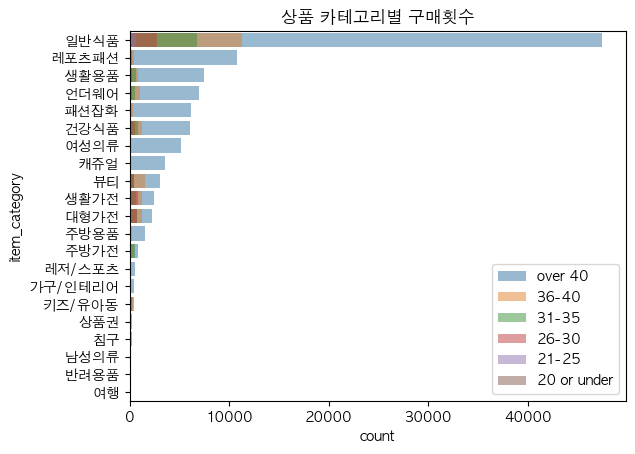

In [38]:
sns.barplot(data=cate_over40, x='count', y='item_category', label='over 40', alpha=0.5)
sns.barplot(data=cate_40, x='count', y='item_category', label='36-40', alpha=0.5)
sns.barplot(data=cate_35, x='count', y='item_category', label='31-35', alpha=0.5)
sns.barplot(data=cate_30, x='count', y='item_category', label='26-30', alpha=0.5)
sns.barplot(data=cate_25, x='count', y='item_category', label='21-25', alpha=0.5)
sns.barplot(data=cate_20, x='count', y='item_category', label='20 or under', alpha=0.5)
plt.legend(loc='lower right')
plt.title('상품 카테고리별 구매횟수')
plt.show()

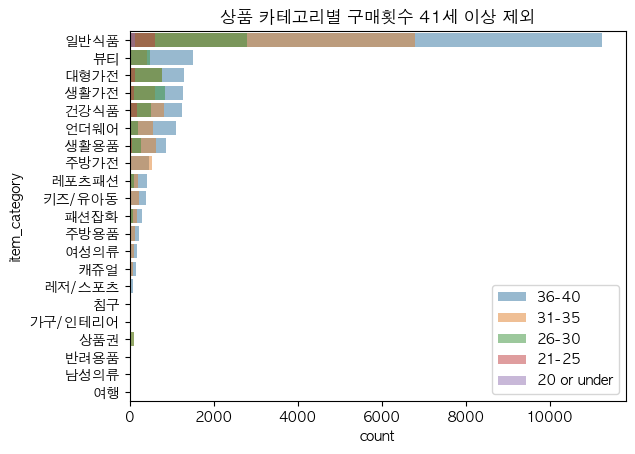

In [39]:
sns.barplot(data=cate_40, x='count', y='item_category', label='36-40', alpha=0.5)
sns.barplot(data=cate_35, x='count', y='item_category', label='31-35', alpha=0.5)
sns.barplot(data=cate_30, x='count', y='item_category', label='26-30', alpha=0.5)
sns.barplot(data=cate_25, x='count', y='item_category', label='21-25', alpha=0.5)
sns.barplot(data=cate_20, x='count', y='item_category', label='20 or under', alpha=0.5)
plt.legend(loc='lower right')
plt.title('상품 카테고리별 구매횟수 41세 이상 제외')
plt.show()

In [40]:
cate_20 = df[df['age_group']=='20 or under']['item_category'].value_counts(normalize=True)
cate_25 = df[df['age_group']=='21-25']['item_category'].value_counts(normalize=True)
cate_30 = df[df['age_group']=='26-30']['item_category'].value_counts(normalize=True)
cate_35 = df[df['age_group']=='31-35']['item_category'].value_counts(normalize=True)
cate_40 = df[df['age_group']=='36-40']['item_category'].value_counts(normalize=True)
cate_over40 = df[df['age_group']=='over 40']['item_category'].value_counts(normalize=True)

In [41]:
cate_20

item_category
일반식품      0.537500
대형가전      0.125000
언더웨어      0.100000
키즈/유아동    0.050000
생활용품      0.045833
건강식품      0.041667
패션잡화      0.037500
레포츠패션     0.020833
생활가전      0.016667
주방용품      0.012500
뷰티        0.004167
주방가전      0.004167
여성의류      0.004167
Name: proportion, dtype: float64

In [42]:
cate_25

item_category
일반식품       0.452901
건강식품       0.140166
대형가전       0.106255
생활가전       0.082894
생활용품       0.041447
뷰티         0.034665
언더웨어       0.027882
레포츠패션      0.023361
패션잡화       0.021100
주방용품       0.019593
상품권        0.012811
여성의류       0.009043
주방가전       0.008289
가구/인테리어    0.006029
캐쥬얼        0.005275
레저/스포츠     0.003768
침구         0.001507
남성의류       0.001507
키즈/유아동     0.001507
Name: proportion, dtype: float64

In [43]:
cate_30

item_category
일반식품       0.434911
생활가전       0.129247
대형가전       0.121334
건강식품       0.078510
뷰티         0.074321
생활용품       0.043134
언더웨어       0.032739
상품권        0.018309
레포츠패션      0.015826
패션잡화       0.012723
여성의류       0.007137
캐쥬얼        0.006362
주방가전       0.005741
주방용품       0.005431
키즈/유아동     0.004655
레저/스포츠     0.004189
가구/인테리어    0.002793
반려용품       0.001552
침구         0.000776
남성의류       0.000310
Name: proportion, dtype: float64

In [44]:
cate_35

item_category
일반식품       0.552777
건강식품       0.067763
대형가전       0.062714
생활용품       0.052044
생활가전       0.050171
언더웨어       0.044958
주방가전       0.044388
뷰티         0.033719
키즈/유아동     0.017837
레포츠패션      0.016534
패션잡화       0.014823
주방용품       0.009855
여성의류       0.009448
상품권        0.008796
캐쥬얼        0.007412
가구/인테리어    0.002606
레저/스포츠     0.001955
침구         0.000977
반려용품       0.000652
남성의류       0.000570
Name: proportion, dtype: float64

In [45]:
cate_40

item_category
일반식품       0.538042
뷰티         0.072208
대형가전       0.061681
생활가전       0.061346
건강식품       0.059862
언더웨어       0.052684
생활용품       0.041774
주방가전       0.021820
레포츠패션      0.020098
키즈/유아동     0.018806
패션잡화       0.014403
주방용품       0.010814
여성의류       0.008757
캐쥬얼        0.007704
레저/스포츠     0.004498
침구         0.001531
가구/인테리어    0.001388
상품권        0.001148
반려용품       0.000861
남성의류       0.000526
여행         0.000048
Name: proportion, dtype: float64

In [46]:
cate_over40

item_category
일반식품       0.446972
레포츠패션      0.101438
생활용품       0.070038
언더웨어       0.066136
패션잡화       0.058236
건강식품       0.057520
여성의류       0.048348
캐쥬얼        0.033747
뷰티         0.029241
생활가전       0.022944
대형가전       0.021436
주방용품       0.014611
주방가전       0.008248
레저/스포츠     0.005543
가구/인테리어    0.004628
키즈/유아동     0.004035
상품권        0.002564
침구         0.002460
남성의류       0.001405
반려용품       0.000424
여행         0.000028
Name: proportion, dtype: float64

#### 고객의 나이대별 구매순위
- 모든 연령대의 고객들이 일반식품을 가장 많이 구매하였습니다.
- 그러나 그 다음 순위부터는 모든 연령대가 다른 카테고리의 상품을 많이 구매하였습니다.

### 채녈별 특징 분석

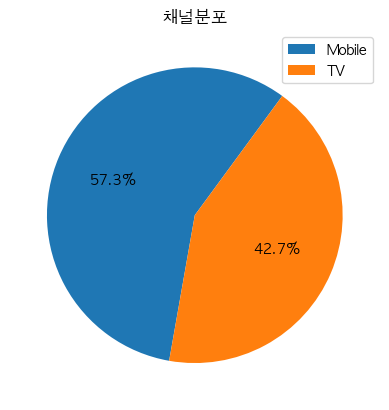

In [47]:
value_counts = df['channel'].value_counts(normalize=True)
ratio = value_counts.values
labels = value_counts.index
plt.pie(ratio, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('채널분포')
plt.legend(labels, loc='upper right')
plt.show()

In [48]:
mobile = df[df['channel']=='Mobile']
tv = df[df['channel']=='TV']

In [49]:
df.groupby('channel')['gender'].value_counts()

channel  gender
Mobile   2         44139
         1         29239
         9         11002
TV       2         35293
         9         14312
         1         13288
Name: count, dtype: int64

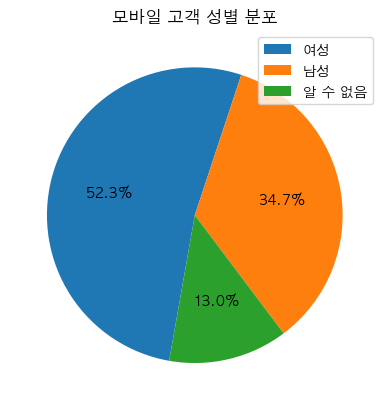

In [50]:
value_counts = mobile['gender'].value_counts(normalize=True)
ratio = value_counts.values
n_labels = value_counts.index
label_dic = {1:'남성', 2:'여성', 9:'알 수 없음'}
labels = [label_dic[i] for i in n_labels]
plt.pie(ratio, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('모바일 고객 성별 분포')
plt.legend(labels, loc='upper right')
plt.show()

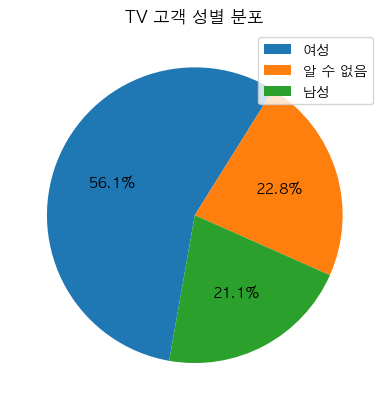

In [51]:
value_counts = tv['gender'].value_counts(normalize=True)
ratio = value_counts.values
n_labels = value_counts.index
label_dic = {1:'남성', 2:'여성', 9:'알 수 없음'}
labels = [label_dic[i] for i in n_labels]
plt.pie(ratio, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('TV 고객 성별 분포')
plt.legend(labels, loc='upper right')
plt.show()

#### 채널별 성별 분포
- 두 집단 모두 여성이 절반이상을 차지하고 있습니다.
- 하지만 TV의 경우 모바일보다 남성의 비율이 약 11.9%p 낮고 알 수 없음의 비율이 약 8.1%p 높습니다.

In [52]:
from scipy import stats

In [53]:
t, p = stats.ttest_ind(mobile['age'], tv['age'], equal_var=True)
print(mobile['age'].mean())
print(tv['age'].mean())
print(p)

44.77319269969187
52.51697327206525
0.0


#### 채널별 평균 연령차이
- 모바일 고객의 평균 연령은 약 45세 이고 TV 고객의 평균 연령은 약 53세 입니다.
- 두 집단의 T-test 결과 P-value가 0으로 이는 통계적으로 유의미한 평균 차이를 갖고 있다는 것을 나타냅니다.

### 채널별 구매 금액 비교

In [54]:
df.head()

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,age_group
0,2021059651101,68.0,9,202106072433746,2021-06-07,TV,캐쥬얼,323421750,밴딩팬츠,49900,1,49900,4990,44910,over 40
1,2018069800502,49.0,2,202105311957155,2021-05-31,TV,레포츠패션,323516657,트랙수트,39000,1,39000,1000,38000,over 40
2,2019073300103,35.0,1,202105138020462,2021-05-13,TV,뷰티,323393459,기초세트,72000,2,144000,27600,116400,36-40
3,2020075283364,41.0,9,202106171444319,2021-06-17,TV,건강식품,323420069,유산균,119000,2,238000,72920,165080,over 40
4,2020104780765,46.0,1,202106024431989,2021-06-02,TV,일반식품,321820178,건강주스,45900,1,45900,2290,43610,over 40


In [55]:
t, p = stats.ttest_ind(mobile['order_amount'], tv['order_amount'], equal_var=True)
print(mobile['order_amount'].mean())
print(tv['order_amount'].mean())
print(p)

109050.41585683811
140843.17491612738
4.738671126745462e-54


In [56]:
t, p = stats.ttest_ind(mobile['discount_amount'], tv['discount_amount'], equal_var=True)
print(mobile['discount_amount'].mean())
print(tv['discount_amount'].mean())
print(p)

6622.789677648732
18838.312960106847
0.0


In [57]:
t, p = stats.ttest_ind(mobile['paid_amount'], tv['paid_amount'], equal_var=True)
print(mobile['paid_amount'].mean())
print(tv['paid_amount'].mean())
print(p)

102427.62617918938
122004.86195602054
6.924600599068578e-26


#### 매출 비교 결과
- 총 구매횟수의 경우 모바일이 TV 보다 많았습니다.
- 하지만 평균 구매금액과 평균 결제금액 모두 TV가 높았으며 T-test 결과 둘 다 통계적으로 유의미한 차이가 있었습니다.
- 할인금액도 역시 TV가 더 높았는데 이 경우에는 TV가 거의 두배 높았으며 역시 T-test 결과 통계적으로 유의미하였습니다.

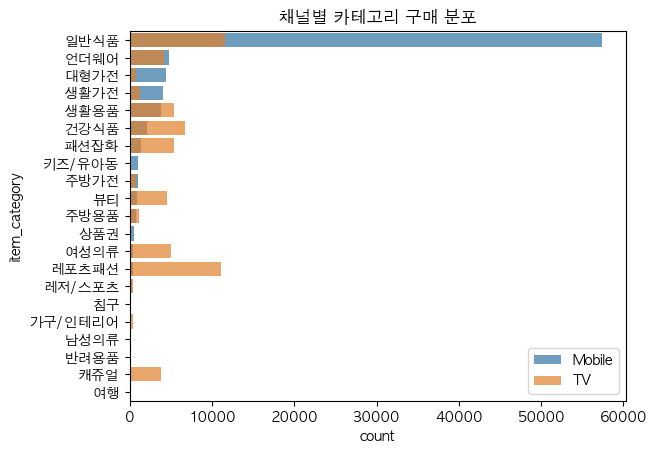

In [58]:
mobile_cnt = mobile['item_category'].value_counts().reset_index()
tv_cnt = tv['item_category'].value_counts().reset_index()

sns.barplot(data=mobile_cnt, x='count', y='item_category', label='Mobile', alpha=0.7)
sns.barplot(data=tv_cnt, x='count', y='item_category', label='TV', alpha=0.7)
plt.title('채널별 카테고리 구매 분포')
plt.show()

#### 카테고리별 구매 분포 비교
- 일반식품과 언더웨어, 생활용품의 경우 두 채널에서 모두 높은 판매를 보여주었습니다.
- 반면 다른 대부분의 상품에서 두 집단은 다른 분포를 보여주고 있습니다.
  - 예를 들어 레포츠패션과 여성의류의 경우에는 거의 대부분의 판매가 TV에서 이루어졌습니다.
  - 반면 대형과전과 생활가전 그리고 키즈/유아동 상품은 대부분의 판매가 모바일에서 이루어졌습니다.

## Time Decay 적용하기

### Time Decay를 통해서 선호하는 채널 분석
- 선호하는 채널을 분석하여 그 채널에서 비슷한 조건의 고객이 많이 구매한 상품 상위 5개 추천

In [59]:
from datetime import datetime, timedelta

In [60]:
df.sort_values('order_date', ascending=False)

,customer_no,age,gender,order_no,order_date,channel,item_category,item_code,item_name,price,qty,order_amount,discount_amount,paid_amount,age_group
69122,2020121967734,58.0,2,202106242229766,2021-06-24,TV,생활가전,323573636,블루투스이어폰,89000,1,89000,10000,79000,over 40
51399,2020081608963,32.0,2,202106241896651,2021-06-24,TV,주방용품,323608310,프라이팬,159000,4,636000,24000,612000,31-35
7090,2020045274483,64.0,2,202106241773617,2021-06-24,TV,여성의류,323632109,원피스,39900,1,39900,1000,38900,over 40
83024,2019086625644,39.0,2,202106241860390,2021-06-24,TV,주방용품,323608310,프라이팬,159000,2,318000,12000,306000,36-40
51363,2020069228052,72.0,2,202106242091636,2021-06-24,TV,생활용품,322413868,화장지,28900,3,86700,6000,80700,over 40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146936,2019112568362,62.0,2,202101018166501,2021-01-01,TV,여성의류,322442163,패딩점퍼,29900,1,29900,1000,28900,over 40
99289,2018119450648,47.0,2,202101019160183,2021-01-01,TV,생활용품,322413868,화장지,28900,1,28900,2000,26900,over 40
23210,2019107678281,66.0,2,202101018558935,2021-01-01,TV,생활용품,322319860,화장지,36810,1,36810,0,36810,over 40
719,2017049614387,66.0,2,202101018474236,2021-01-01,TV,언더웨어,322403230,여성팬티,39900,1,39900,1000,38900,over 40


In [61]:
## 유저 단위로 channel별 구매 건수 구하기
user_summary = df.groupby(['customer_no', 'channel'])['order_no'].nunique().reset_index()
user_summary = user_summary.rename(columns={'order_no': 'cnt_order'})
user_summary.head(10)

,customer_no,channel,cnt_order
0,2015010000596,Mobile,1
1,2015010000596,TV,1
2,2015010000652,Mobile,1
3,2015010001152,Mobile,1
4,2015010001152,TV,5
5,2015010001213,TV,1
6,2015010001954,TV,1
7,2015010004299,Mobile,1
8,2015010004451,TV,2
9,2015010005813,Mobile,1


In [62]:
## 구매 건수가 많은 channel별로 순위 매기기
user_summary['rn'] = user_summary.sort_values(by='cnt_order', ascending=False) \
             .groupby('customer_no') \
             .cumcount() + 1

user_summary.head(10)

,customer_no,channel,cnt_order,rn
0,2015010000596,Mobile,1,1
1,2015010000596,TV,1,2
2,2015010000652,Mobile,1,1
3,2015010001152,Mobile,1,2
4,2015010001152,TV,5,1
5,2015010001213,TV,1,1
6,2015010001954,TV,1,1
7,2015010004299,Mobile,1,1
8,2015010004451,TV,2,1
9,2015010005813,Mobile,1,1


In [63]:
## 최다 구매 channel 정보만 남기기
user_max_item_info = user_summary[user_summary['rn'] == 1].reset_index(drop = True)
user_max_item_info.head()

,customer_no,channel,cnt_order,rn
0,2015010000596,Mobile,1,1
1,2015010000652,Mobile,1,1
2,2015010001152,TV,5,1
3,2015010001213,TV,1,1
4,2015010001954,TV,1,1


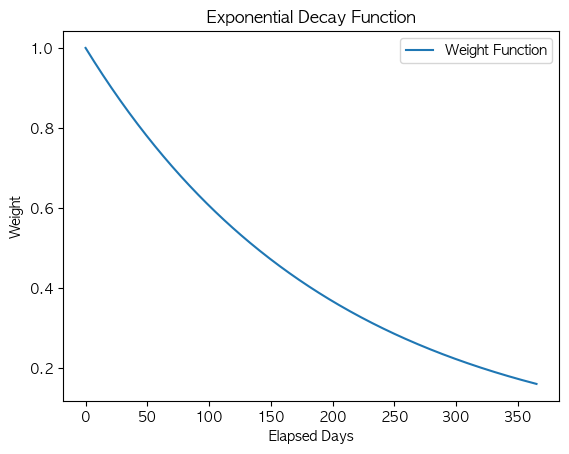

In [64]:
import numpy as np

# 경과일수 생성 (예: 0부터 365까지의 경과일수)
elapsed_days = np.arange(0, 366, 1)

# 가중치 계산 (0.995^경과일수)
weights = 0.995**elapsed_days

# 그래프 그리기
plt.plot(elapsed_days, weights, label='Weight Function')
plt.title('Exponential Decay Function')
plt.xlabel('Elapsed Days')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [65]:
# 추천을 제공하는 날짜가 이 데이터의 가장 마지막 구매 일자의 다음 날이라고 가정
recommend_ymd = df['order_date'].max() + pd.Timedelta(days=1)
print(recommend_ymd)

2021-06-25 00:00:00


In [66]:
## 유저별 데이터 집계
decay_summary = df.groupby(['customer_no', 'order_date', 'channel'])['order_no'].nunique().reset_index()
decay_summary = decay_summary.rename(columns={'order_no': 'cnt_order'})
decay_summary.head(10)

,customer_no,order_date,channel,cnt_order
0,2015010000596,2021-01-15,TV,1
1,2015010000596,2021-06-03,Mobile,1
2,2015010000652,2021-03-06,Mobile,1
3,2015010001152,2021-02-13,TV,1
4,2015010001152,2021-02-18,TV,1
5,2015010001152,2021-03-02,Mobile,1
6,2015010001152,2021-03-23,TV,1
7,2015010001152,2021-04-24,TV,1
8,2015010001152,2021-05-25,TV,1
9,2015010001213,2021-02-25,TV,1


In [67]:
## 파라미터 설정
day_parameter = 0.995

## Time Decay 적용 컬럼 생성
decay_summary['decay_day'] = day_parameter ** ((recommend_ymd - decay_summary['order_date']).dt.days)
decay_summary.head(10)

,customer_no,order_date,channel,cnt_order,decay_day
0,2015010000596,2021-01-15,TV,1,0.446186
1,2015010000596,2021-06-03,Mobile,1,0.895587
2,2015010000652,2021-03-06,Mobile,1,0.573274
3,2015010001152,2021-02-13,TV,1,0.515996
4,2015010001152,2021-02-18,TV,1,0.529092
5,2015010001152,2021-03-02,Mobile,1,0.561894
6,2015010001152,2021-03-23,TV,1,0.624266
7,2015010001152,2021-04-24,TV,1,0.732877
8,2015010001152,2021-05-25,TV,1,0.856082
9,2015010001213,2021-02-25,TV,1,0.547986


In [68]:
## decay_day 집계
user_decay_summary = decay_summary.groupby(['customer_no', 'channel']).agg(cnt_order = ('cnt_order', 'sum'),
                                                                             decay_day = ('decay_day', 'sum')).reset_index()

user_decay_summary.head(10)

,customer_no,channel,cnt_order,decay_day
0,2015010000596,Mobile,1,0.895587
1,2015010000596,TV,1,0.446186
2,2015010000652,Mobile,1,0.573274
3,2015010001152,Mobile,1,0.561894
4,2015010001152,TV,5,3.258313
5,2015010001213,TV,1,0.547986
6,2015010001954,TV,1,0.564717
7,2015010004299,Mobile,1,0.697047
8,2015010004451,TV,2,1.373534
9,2015010005813,Mobile,1,0.834893


In [69]:
## decay_day 값이 큰 아이템별로 순위 매기기
user_decay_summary['rn'] = user_decay_summary.sort_values(by='decay_day', ascending=False) \
             .groupby('customer_no') \
             .cumcount() + 1

user_decay_summary.head(10)

,customer_no,channel,cnt_order,decay_day,rn
0,2015010000596,Mobile,1,0.895587,1
1,2015010000596,TV,1,0.446186,2
2,2015010000652,Mobile,1,0.573274,1
3,2015010001152,Mobile,1,0.561894,2
4,2015010001152,TV,5,3.258313,1
5,2015010001213,TV,1,0.547986,1
6,2015010001954,TV,1,0.564717,1
7,2015010004299,Mobile,1,0.697047,1
8,2015010004451,TV,2,1.373534,1
9,2015010005813,Mobile,1,0.834893,1


In [70]:
## Time decay 적용한 최선호 구매 아이템 정보만 남기기
user_decay_channel_info = user_decay_summary[user_decay_summary['rn'] == 1].reset_index(drop = True)
user_decay_channel_info.head()

,customer_no,channel,cnt_order,decay_day,rn
0,2015010000596,Mobile,1,0.895587,1
1,2015010000652,Mobile,1,0.573274,1
2,2015010001152,TV,5,3.258313,1
3,2015010001213,TV,1,0.547986,1
4,2015010001954,TV,1,0.564717,1


In [71]:
user_decay_channel_info['channel'].value_counts()

channel
TV        45303
Mobile    26728
Name: count, dtype: int64

In [72]:
test = df.groupby('customer_no')[['gender', 'age_group']].value_counts().reset_index()

In [73]:
unique_gender_age = test[test['count']!=0]

In [74]:
user_decay_channel_info.head()

,customer_no,channel,cnt_order,decay_day,rn
0,2015010000596,Mobile,1,0.895587,1
1,2015010000652,Mobile,1,0.573274,1
2,2015010001152,TV,5,3.258313,1
3,2015010001213,TV,1,0.547986,1
4,2015010001954,TV,1,0.564717,1


In [75]:
unique_gender_age.head()

,customer_no,gender,age_group,count
0,2015010000596,1,over 40,2
18,2015010000652,2,over 40,1
36,2015010001152,1,over 40,6
54,2015010001213,2,36-40,1
72,2015010001954,2,over 40,1


In [76]:
merge_df = pd.merge(user_decay_channel_info, unique_gender_age, on=['customer_no'])

In [77]:
merge_df.head()

,customer_no,channel,cnt_order,decay_day,rn,gender,age_group,count
0,2015010000596,Mobile,1,0.895587,1,1,over 40,2
1,2015010000652,Mobile,1,0.573274,1,2,over 40,1
2,2015010001152,TV,5,3.258313,1,1,over 40,6
3,2015010001213,TV,1,0.547986,1,2,36-40,1
4,2015010001954,TV,1,0.564717,1,2,over 40,1


In [78]:
from tqdm import tqdm

In [79]:
len(merge_df['customer_no'])

72031

In [80]:
res = []
for i in tqdm(merge_df['customer_no']):
    u_df = merge_df[merge_df['customer_no']==i]
    gender = u_df['gender'].values[0]
    age_group = u_df['age_group'].values[0]
    channel = u_df['channel'].values[0]
    target = df[(df['channel']==channel) & (df['gender']==gender) & (df['age_group']==age_group)]
    result = list(target['item_name'].value_counts()[:5].index)
    if not len(result) == 0:
        res.append(result)
    else: 
        res.append([])

  0%|          | 0/72031 [00:00<?, ?it/s]

100%|██████████| 72031/72031 [10:10<00:00, 117.91it/s]


In [81]:
res_df = merge_df.copy()
res_df['rec'] = res

In [82]:
res_df

,customer_no,channel,cnt_order,decay_day,rn,gender,age_group,count,rec
0,2015010000596,Mobile,1,0.895587,1,1,over 40,2,"[생수, 드로즈, 기타 간편/즉석식품, 건강음료, 드럼세탁기]"
1,2015010000652,Mobile,1,0.573274,1,2,over 40,1,"[생수, 기타 간편/즉석식품, 드로즈, 골드바/코인, 기타 반찬류]"
2,2015010001152,TV,5,3.258313,1,1,over 40,6,"[티셔츠, 캐주얼화, 트랙수트, 오메가3, 트레킹화]"
3,2015010001213,TV,1,0.547986,1,2,36-40,1,"[오메가3, 황사마스크, 티셔츠, 트랙수트, 화장지]"
4,2015010001954,TV,1,0.564717,1,2,over 40,1,"[티셔츠, 캐주얼화, 트랙수트, 황사마스크, 팬츠]"
...,...,...,...,...,...,...,...,...,...
72026,2021069984125,TV,1,0.900087,1,2,over 40,1,"[티셔츠, 캐주얼화, 트랙수트, 황사마스크, 팬츠]"
72027,2021069986151,TV,1,0.900087,1,2,over 40,1,"[티셔츠, 캐주얼화, 트랙수트, 황사마스크, 팬츠]"
72028,2021069994005,TV,1,0.918316,1,9,over 40,1,"[오메가3, 캐주얼화, 티셔츠, 트랙수트, 황사마스크]"
72029,2021069994853,TV,1,0.900087,1,1,over 40,1,"[티셔츠, 캐주얼화, 트랙수트, 오메가3, 트레킹화]"


In [83]:
res_df.to_csv('rec.csv')